In [277]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sym
import scipy.optimize as sci

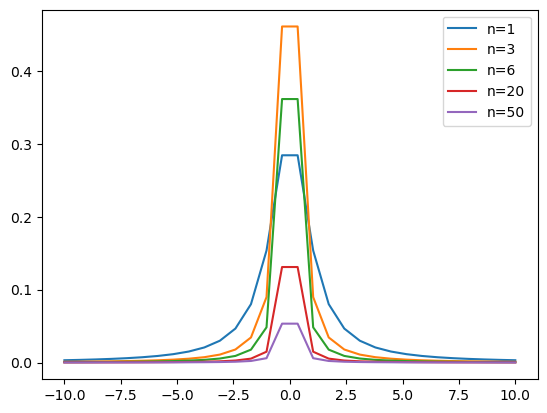

In [278]:
def F(n,x):
    return (n/np.pi)*(1/(1+n**2*x**2))

x_ = np.linspace(-10,10,30)

plt.plot(x_,F(1,x_),label='n=1')
plt.plot(x_,F(3,x_),label='n=3')
plt.plot(x_,F(6,x_),label='n=6')
plt.plot(x_,F(20,x_),label='n=20')
plt.plot(x_,F(50,x_),label='n=50')
plt.legend()

Text(0, 0.5, 'y')

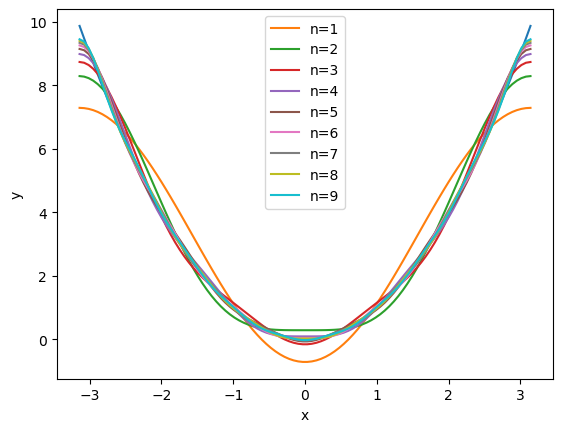

In [279]:
x_ = np.linspace(-np.pi,np.pi,100)
a = ((np.pi**2)/3)
tot = []
n = np.array([1,2,3,4,5,6,7,8,9])

for i in range(len(n)):
    tot.append((4/(n[i]**2))*(np.cos(n[i]*x_))*((-1)**n[i]))

plt.plot(x_,(x_)**2)
plt.plot(x_,a+tot[0],label='n=1')
plt.plot(x_,a+tot[0]+tot[1],label='n=2')
plt.plot(x_,a+tot[0]+tot[1]+tot[2],label='n=3')
plt.plot(x_,a+tot[0]+tot[1]+tot[2]+tot[3],label='n=4')
plt.plot(x_,a+tot[0]+tot[1]+tot[2]+tot[3]+tot[4],label='n=5')
plt.plot(x_,a+tot[0]+tot[1]+tot[2]+tot[3]+tot[4]+tot[5],label='n=6')
plt.plot(x_,a+tot[0]+tot[1]+tot[2]+tot[3]+tot[4]+tot[5]+tot[6],label='n=7')
plt.plot(x_,a+tot[0]+tot[1]+tot[2]+tot[3]+tot[4]+tot[5]+tot[6]+tot[7],label='n=8')
plt.plot(x_,a+tot[0]+tot[1]+tot[2]+tot[3]+tot[4]+tot[5]+tot[6]+tot[7]+tot[8],label='n=9')
plt.legend()
plt.xlabel('x')
plt.ylabel('y')

In [296]:
Z,R,R3,R4,R5,C,w = sym.symbols("Z,R,R3,R4,R5,C,\omega",real=True)
a = (Z*(Z/2))/((R+Z)*(2*(Z/2)+R))
b = (Z*(Z/2)*(R4+R5)+(R5*R*Z))/((R4+R5)*(2*(Z/2)+R)*(R+Z))
c = ((R*R3*(R4+R5)+Z*R*R5))/((R+Z)*(R4+R5)*Z)
d = (R3*R)/(Z*(R+Z))
vout = (a+d)/(1-(c+b))
vout = vout.subs(Z,1/(1j*w*C))
vout = vout.simplify()
vout

(R4 + R5)*(1.0*I*C**2*R*R3*\omega**2*(C*R*\omega - 1.0*I)**2 - 0.5*C*R*\omega + 0.5*I)/((C*R*\omega - 1.0*I)*(1.0*I*C*R*R5*\omega - 1.0*I*C*R*\omega*(C*R*\omega - 1.0*I)*(C*R3*\omega*(R4 + R5) - 1.0*I*R5) + 0.5*R4 + 0.5*R5 + (R4 + R5)*(C*R*\omega - 1.0*I)**2))

In [297]:
numerico = vout.subs([(R,10e6),(R4,20e3),(R5,30e3),(C,270e-12),(R3,5e6)])
numerico = numerico.simplify()
numerico

(1.3286025e-6*I*\omega**4 + 0.00098415*\omega**3 - 0.18225*I*\omega**2 - 67.5*\omega + 25000.0*I)/(-1.3286025e-6*I*\omega**4 - 0.00059049*\omega**3 - 0.25515*I*\omega**2 - 175.5*\omega + 25000.0*I)

In [298]:
Amplitud = sym.Abs(numerico)
Amplitud

1.0*sqrt(2.82429536481e-21*\omega**8 + 7.74840978e-16*\omega**6 + 4.33680868994202e-29*I*\omega**5 - 5.31441e-11*\omega**4 - 7.29e-6*\omega**2 + 1)/sqrt(2.82429536481e-21*\omega**8 + 1.64266287336e-15*\omega**6 - 4.33680868994202e-29*I*\omega**5 + 3.2949342e-10*\omega**4 + 2.88684e-5*\omega**2 + 1)

In [299]:
#frecuencia de corte
am = sym.lambdify(w,Amplitud)
sci.minimize_scalar(am)

 message: 
          Optimization terminated successfully;
          The returned value satisfies the termination criteria
          (using xtol = 1.48e-08 )
 success: True
     fun: (0.2939066920617308+2.633130493211628e-17j)
       x: (305.80338027069195-4.085511268426655e-15j)
     nit: 9
    nfev: 22

c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1699: ComplexWarning: Casting complex values to real discards the imaginary part
  return math.isfinite(val)
c:\ProgramData\anaconda3\Lib\site-packages\matplotlib\cbook.py:1345: ComplexWarning: Casting complex values to real discards the imaginary part
  return np.asarray(x, float)


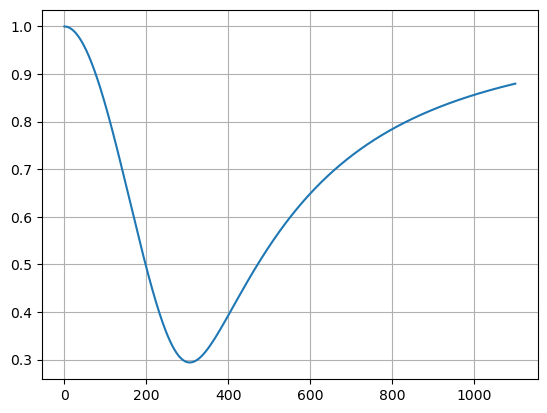

In [330]:
lam = sym.lambdify(w,Amplitud)
w_ = np.linspace(0,1100,1100)
plt.plot(w_,lam(w_))
plt.grid()

In [333]:
#frecuencias de corte
ab = lam(w_)
fc = []
contador = 0
for i in ab:
    re = sym.re(i)
    contador +=1
    if re<=(0.707):
        fc.append((re,contador))

print(fc[0],fc[-1])

(0.706158195985617, 140) (0.706774416154601, 670)
